In [52]:
import pandas as pd # manejo y analisis de estructuras
import numpy as np # calculo numerico y el analisis de datos
import seaborn as sns # creacion graficos estadisticos
import matplotlib.pyplot as plt # creacion de graficos en dos dimensiones

# librerias para implementar modelos de ciencias de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [53]:
# Cargar datos desde un archivo CSV
data = pd.read_csv('C:\\Users\\User\\OneDrive\\Escritorio\\Titanic-Dataset.csv')


In [54]:
#realizamos lectura de los datos para el analisis exploratorio

print(data.head(50))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
2

In [55]:
# Descripcion de los datos
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

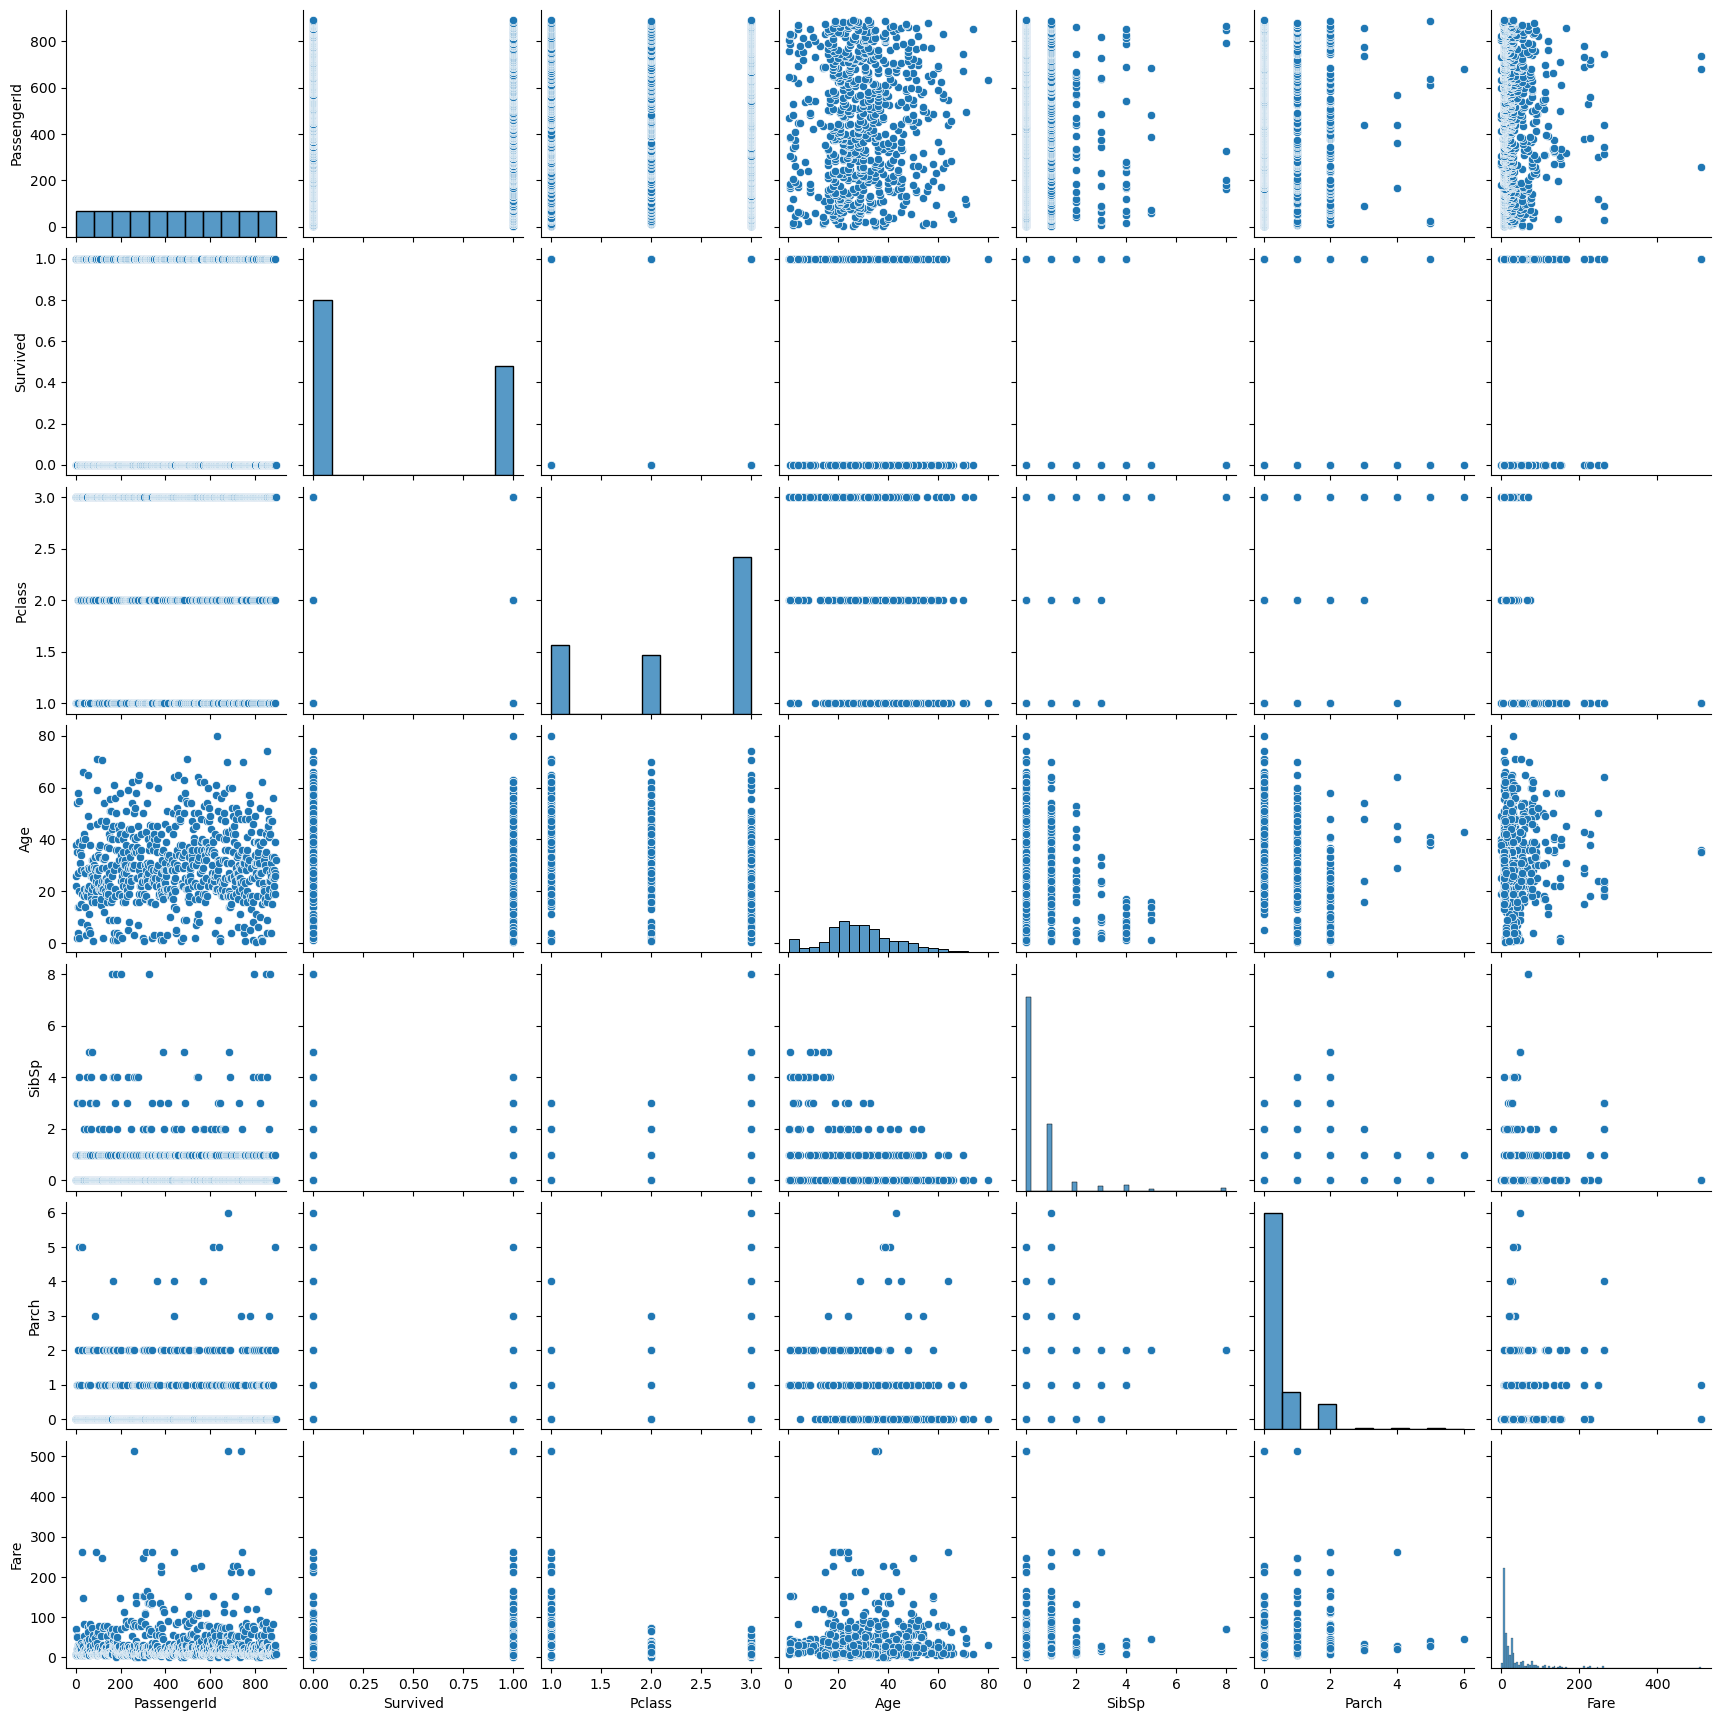

In [56]:

# Visualización de relaciones entre variables
# Scatter plot
sns.pairplot(data)
plt.show()


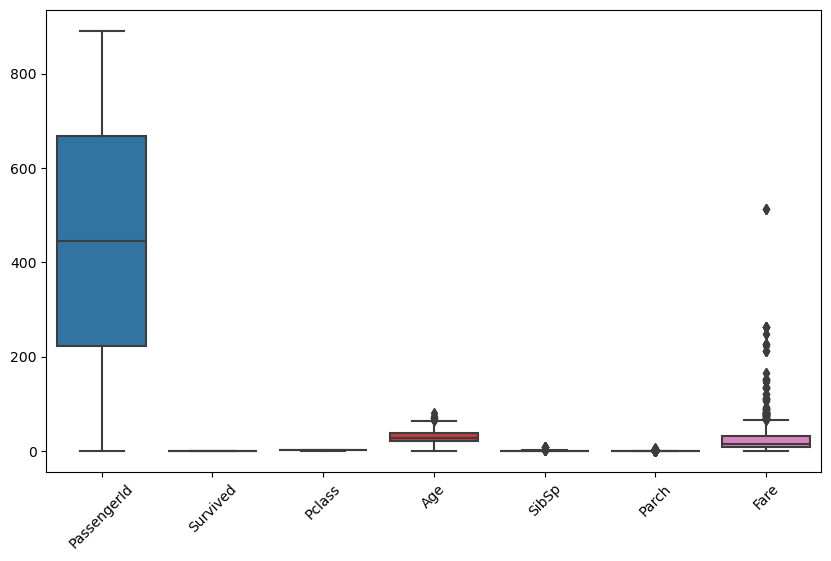

In [57]:
# Boxplot para identificar valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

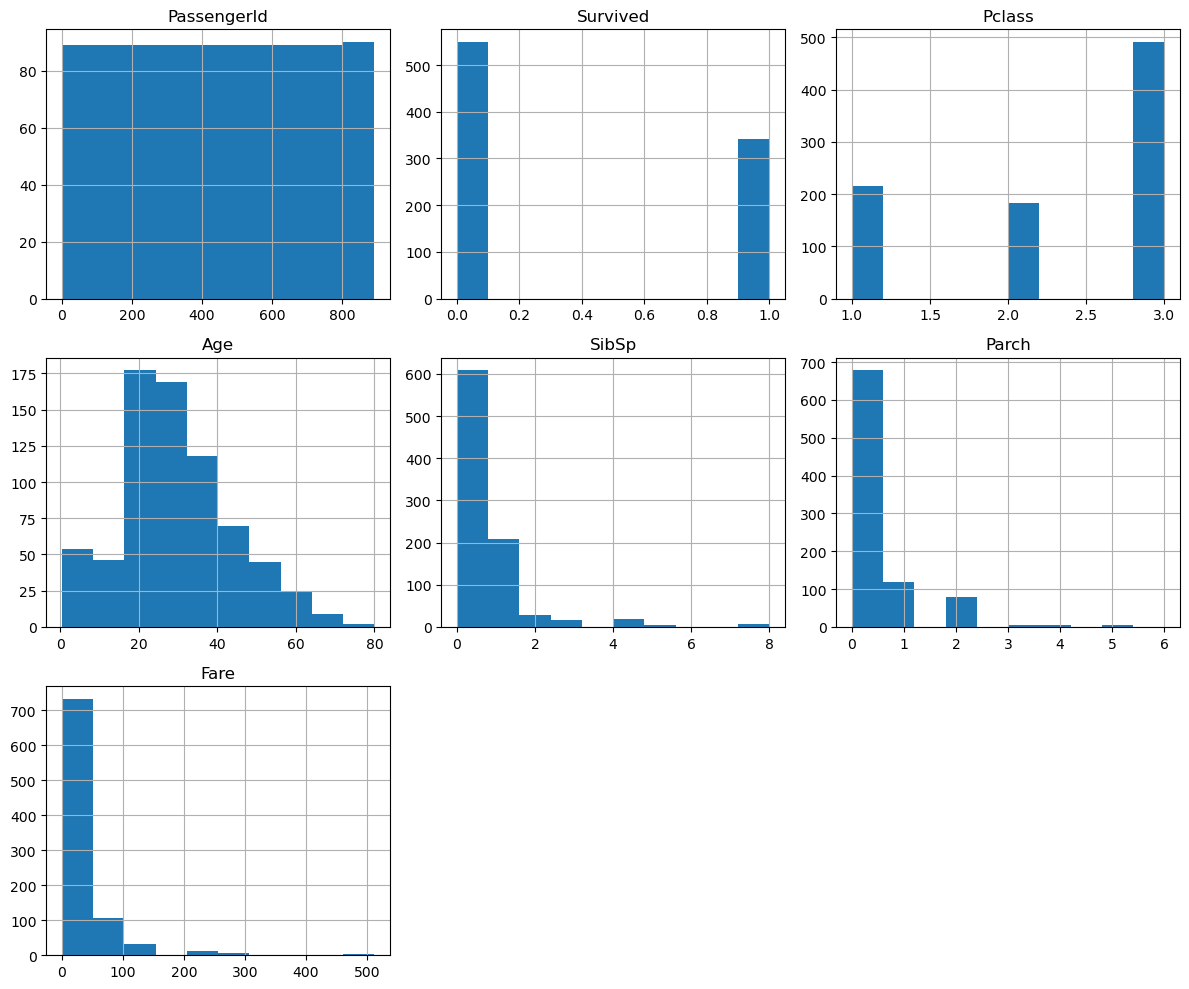

In [58]:
# Histogramas para variables numéricas
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


In [ ]:


#Punto 2 - Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.



In [59]:
from sklearn.impute import SimpleImputer

# Creamos un objeto SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Seleccionamos las columnas numéricas que tienen valores faltantes
cols_with_missing_values = ['Age', 'PassengerId', 'Survived', 'Pclass']

# Aplicamos la imputación de valores faltantes a esas columnas
data[cols_with_missing_values] = imputer.fit_transform(df[cols_with_missing_values])

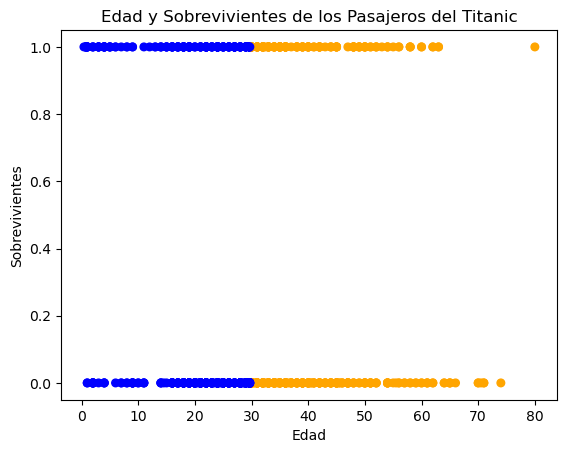

In [61]:
#Revision de datos faltantes

# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3500
# y en el eje Y: entre 0 y 800000
filtered_data = data[(data['Age'] <= 3500) & (data['Survived'] <= 800000)]

colores=['orange','blue']
tamanios=[30,60]

f1 = filtered_data['Age'].values
f2 = filtered_data['Survived'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de 'year'
media_year = filtered_data['Age'].mean()
asignar=[]
for index, row in filtered_data.iterrows():
    if row['Age'] > media_year:
        asignar.append(colores[0])  # Por encima de la media en naranja
    else:
        asignar.append(colores[1])  # Por debajo de la media en azul

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.xlabel('Edad')
plt.ylabel('Sobrevivientes')
plt.title('Edad y Sobrevivientes de los Pasajeros del Titanic')
plt.show()


In [62]:
# eliminamos NaN
data.dropna(inplace=True)

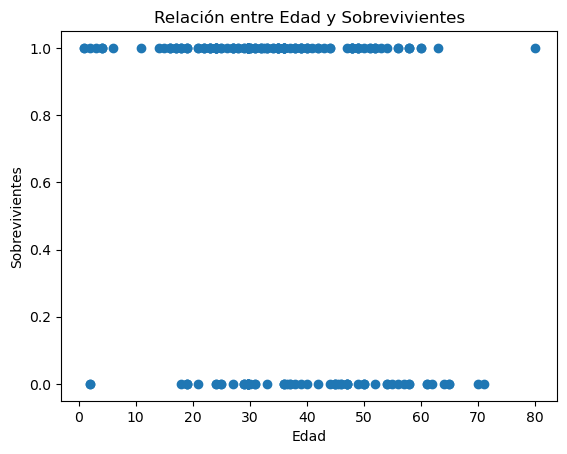

In [63]:
import matplotlib.pyplot as plt

# Visualización de la relación entre dos variables numéricas
plt.scatter(data['Age'], data['Survived'])
plt.xlabel('Edad')
plt.ylabel('Sobrevivientes')
plt.title('Relación entre Edad y Sobrevivientes')
plt.show()


In [ ]:


#Punto 3- Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características



In [64]:
#Clase del titanic

print(data['Survived'].value_counts())

Survived
1.0    134
0.0     68
Name: count, dtype: int64


In [65]:
data[['Survived']].head(50)

,Survived
1,1.0
3,1.0
6,0.0
10,1.0
11,1.0
21,1.0
23,1.0
27,0.0
31,1.0
52,1.0


In [ ]:


#Punto 4 Dividir el dataset en Train y Test para evaluar correctamente el modelo.



In [66]:
#Porcentaje de datos para procesamiento (train)= 75%, y para prueba (test) = 25%

from sklearn.model_selection import train_test_split

# Se crean variables X y Y para almacenar la información del entrenamiento
X = data.drop('Survived', axis=1)  # Se cargan los datos de entrenamiento sin la columna 'Survived'
Y = data['Survived']  # Se cargan los datos de entrenamiento de la columna 'Pclass'

# La función train_test_split crea una división de un conjunto de datos en dos bloques: uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [67]:
print (X_train)

     PassengerId  Pclass                                          Name  \
550        551.0     1.0                   Thayer, Mr. John Borland Jr   
806        807.0     1.0                        Andrews, Mr. Thomas Jr   
449        450.0     1.0                Peuchen, Major. Arthur Godfrey   
671        672.0     1.0                        Davidson, Mr. Thornton   
128        129.0     3.0                             Peter, Miss. Anna   
..           ...     ...                                           ...   
311        312.0     1.0                    Ryerson, Miss. Emily Borie   
849        850.0     1.0  Goldenberg, Mrs. Samuel L (Edwiga Grabowska)   
520        521.0     1.0                         Perreault, Miss. Anne   
251        252.0     3.0    Strom, Mrs. Wilhelm (Elna Matilda Persson)   
748        749.0     1.0                     Marvin, Mr. Daniel Warner   

        Sex        Age  SibSp  Parch      Ticket      Fare            Cabin  \
550    male  17.000000      0   

In [68]:
print (Y_train)

550    1.0
806    0.0
449    1.0
671    0.0
128    1.0
      ... 
311    1.0
849    1.0
520    1.0
251    0.0
748    0.0
Name: Survived, Length: 151, dtype: float64


In [ ]:


#Punto 5 - Entrenar el modelo configurando los diferentes hiperparámetros.



In [69]:
# Construir modelo de regresion lineal 

# Combinar datos de entrenamiento y prueba
X_combined = pd.concat([X_train, X_test], axis=0)

# Codificar características categóricas en variables binarias
X_combined_encoded = pd.get_dummies(X_combined)

# Dividir datos combinados en conjuntos de entrenamiento y prueba nuevamente
X_train_encoded = X_combined_encoded[:len(X_train)]
X_test_encoded = X_combined_encoded[len(X_train):]

# Construir modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo
modelo_regresion.fit(X_train_encoded, Y_train)

# Realizar predicciones
Prediccion = modelo_regresion.predict(X_test_encoded)


In [42]:
print (Y_test)

97     1.0
745    1.0
486    1.0
452    1.0
776    3.0
796    1.0
21     2.0
659    1.0
62     1.0
689    1.0
299    1.0
556    1.0
782    1.0
698    1.0
345    2.0
27     1.0
177    1.0
581    1.0
194    1.0
332    1.0
763    1.0
647    1.0
245    1.0
710    1.0
298    1.0
544    1.0
781    1.0
809    1.0
540    1.0
230    1.0
92     1.0
275    1.0
679    1.0
498    1.0
123    2.0
835    1.0
577    1.0
11     1.0
366    1.0
484    1.0
591    1.0
310    1.0
137    1.0
505    1.0
741    1.0
305    1.0
31     1.0
336    1.0
523    1.0
641    1.0
327    2.0
Name: Pclass, dtype: float64


In [70]:
print (Prediccion)

[0.50353832 0.40758335 1.24249072 0.57560253 0.58801523 0.82249238
 0.30997296 0.36661627 0.44489103 1.0164409  0.38783239 0.97717187
 0.5343008  0.77881465 0.91165636 0.66129934 0.72181067 1.1374093
 0.76092193 0.49367925 1.13509831 0.46626492 0.73975971 0.99691125
 0.4226704  0.64650181 1.3163267  1.20691985 0.69123066 0.86682353
 0.44253914 0.76796473 0.5503864  0.24450571 0.75113691 1.05895009
 0.58701355 0.51639011 0.8689347  0.71406874 1.01085896 0.97589093
 0.62988689 0.75089462 0.64836719 0.01861765 1.08528619 0.64886063
 0.85125598 1.03507873 0.59127571]


In [ ]:


#Punto 6 - Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc



In [71]:
# Desempeño del modelo de regresion

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(Y_test, Prediccion)
print("Error cuadrático medio (MSE):", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(Y_test, Prediccion)
print("Error absoluto medio (MAE):", mae)

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(Y_test, Prediccion)
print("Coeficiente de determinación (R^2):", r2)



Error cuadrático medio (MSE): 0.20477294170993385
Error absoluto medio (MAE): 0.37761502370494476
Coeficiente de determinación (R^2): 0.10334272493680463


In [ ]:


#Punto 7 - Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.



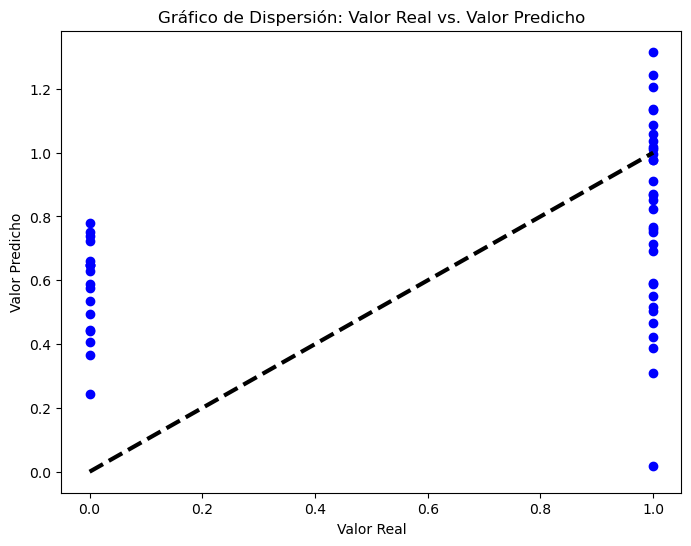

In [72]:
#Gráfico de dispersión de los valores reales vs. los valores predichos: 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Prediccion, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Gráfico de Dispersión: Valor Real vs. Valor Predicho')
plt.show()


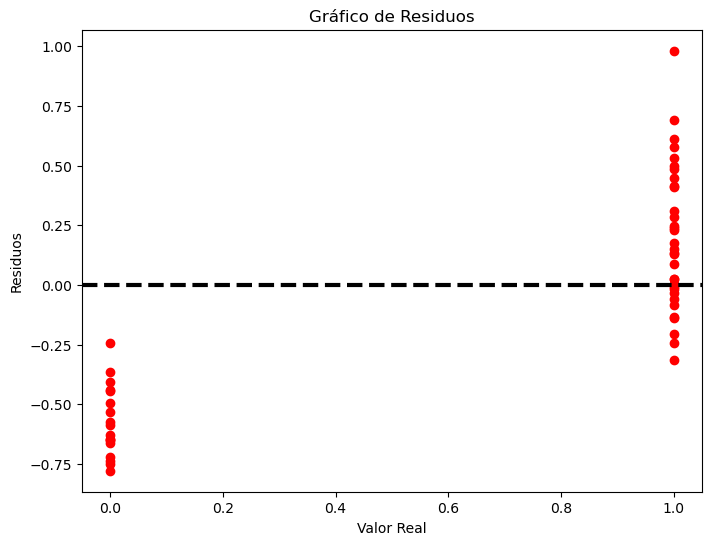

In [73]:
#Gráfico de residuos: 
residuos = Y_test - Prediccion
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, residuos, color='red')
plt.xlabel('Valor Real')
plt.ylabel('Residuos')
plt.axhline(y=0, color='k', linestyle='--', lw=3)
plt.title('Gráfico de Residuos')
plt.show()


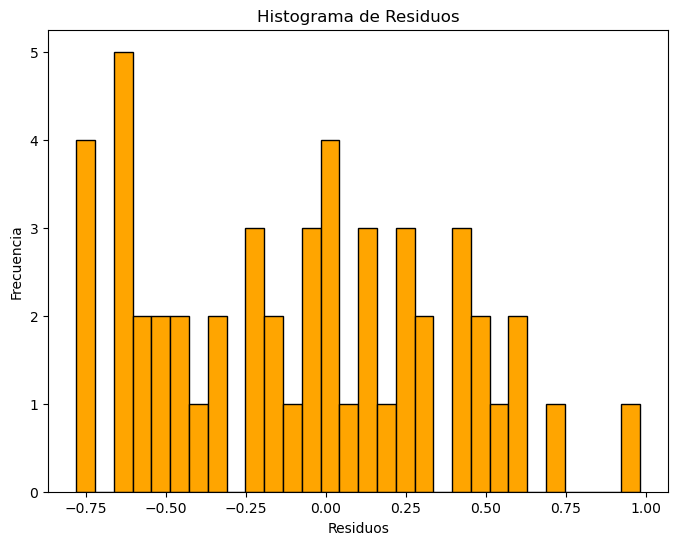

In [74]:
#Histograma de residuos: 
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=30, color='orange', edgecolor='k')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()


In [ ]:


#Interpretar, analizar y documentar los resultados obtenidos



In [ ]:
# Error cuadrático medio (MSE):En este caso, un MSE de 0.2048 sugiere que el modelo tiene un nivel moderado de precisión en la predicción de los valores.

# Error absoluto medio (MAE): Un MAE de 0.3776 implica que, en promedio, las predicciones del modelo difieren de los valores reales en aproximadamente 0.3776 unidades.

# Coeficiente de determinación (R^2):  Un R cuadrado más cercano a 1 indica un mejor ajuste del modelo a los datos. Sin embargo, en este caso, un R^2 de 0.1033 sugiere que el modelo explica solo alrededor del 10.33% de la varianza en la variable dependiente, lo que indica que el modelo tiene un ajuste deficiente a los datos.
